## Importing Libraries

### Python libraries contain functions packaged into a bundle serving a unique purpose

We shall be using libraries numpy pandas matplpotlib and seaborn for our analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset into dataframe

### Pandas is the library that is most popular and regularly used to load and analyse data

Let us read in a csv file into a dataframe object women_stem. The pandas function read_csv reads the csv, with default delimiter as comma (,).

In [2]:
women_stem = pd.read_csv('./dataset/women-stem.csv', na_values='0', sep=',', low_memory=False)

Let us see the columns which the dataset contains

In [3]:
women_stem.columns

Index(['Rank', 'Major_code', 'Major', 'Major_category', 'Total', 'Men',
       'Women', 'ShareWomen', 'Median'],
      dtype='object')

### Viewing snapshot of the data

The head() method is useful to view few top rows in the dataset 

In [4]:
women_stem.head(5)

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


From the above snapshot, we can derive that ShareWomen is ratio of Women to Men i.e. (Number of Women)/(Number of Men + Number of Women).

## Checking the size of the dataset

### We need to gauge the size of the dataset to determine the number of rows and columns in the dataframe

The shape attribute of the dataframe outputs number of rows and columns in the dataframe

In [5]:
women_stem.shape

(76, 9)

The above data (76, 9) follows the format (number_of_rows, number_of_columns). Hence we can see that the dataset contains 76 rows and 9 columns

## Describing the numerical columns in the dataset

### The basic statistics of the dataset like mean, standard deviation help to find the insights into the data

The describe() method will calcualte the count, mean, standard deviation, minimum, maximum and quartiles (25%, 50% and 75%) for each of the numerical columns in the dataset

In [6]:
women_stem.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Median
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,38.500000,3580.026316,25515.289474,12800.763158,12714.526316,0.436929,46118.421053
std,22.083176,1437.455038,43998.008553,21307.554101,29056.014723,0.232176,13187.223216
min,1.000000,1301.000000,609.000000,488.000000,77.000000,0.077453,26000.000000
25%,19.750000,2409.750000,3782.000000,2047.750000,1227.500000,0.247918,36150.000000
50%,38.500000,3601.500000,11047.500000,4583.000000,5217.500000,0.405868,44350.000000
75%,57.250000,5002.250000,27509.250000,11686.500000,12463.500000,0.591803,52250.000000
max,76.000000,6199.000000,280709.000000,111762.000000,187621.000000,0.967998,110000.000000


## Checking if the dataset contains null

### The data needs to be validated if any of columns contain null or empty values

The method isnull() will vlaidate whether data in the cell contains a null. The sum() function will add all the columns having 'True' in them

In [7]:
women_stem.isnull().sum()

Rank              0
Major_code        0
Major             0
Major_category    0
Total             0
Men               0
Women             0
ShareWomen        0
Median            0
dtype: int64

As you can see, since the sum is zero, none of the columns in the dataset contain null or missing values

## Exploratory Analysis

#### Plotting the data in the dataframe in visual format helps get insight into the data

We shall plot the ratio of men to women in visual format for each of the major categories

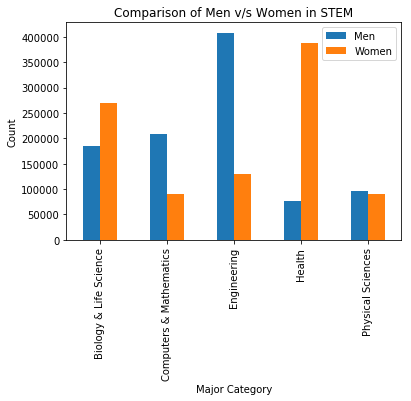

In [8]:
%matplotlib inline

#Grouping the number of men and women by category of major
women_stem_major = women_stem.groupby(['Major_category']).agg({'Men':'sum', 'Women':'sum'})
women_stem_major.plot.bar()

plt.xlabel('Major Category')
plt.ylabel("Count")
plt.title("Comparison of Men v/s Women in STEM")

## Transformation

#### Some of the variables might not seem to have direct relation to the target variable and we need to transform to get into appropriate format

On of the transformations is the inverse transformation. We take the inverse of all the values and try to identify if there is correlation with "ShareWomen". We shall take the inverse of "Median" of the salaries

In [9]:
women_stem['Median_Inverse'] = 1 / women_stem['Median']

## Pairplot

### Seaborn library contains a powerful visualiztion to plot relationship between variables (columns)

The pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

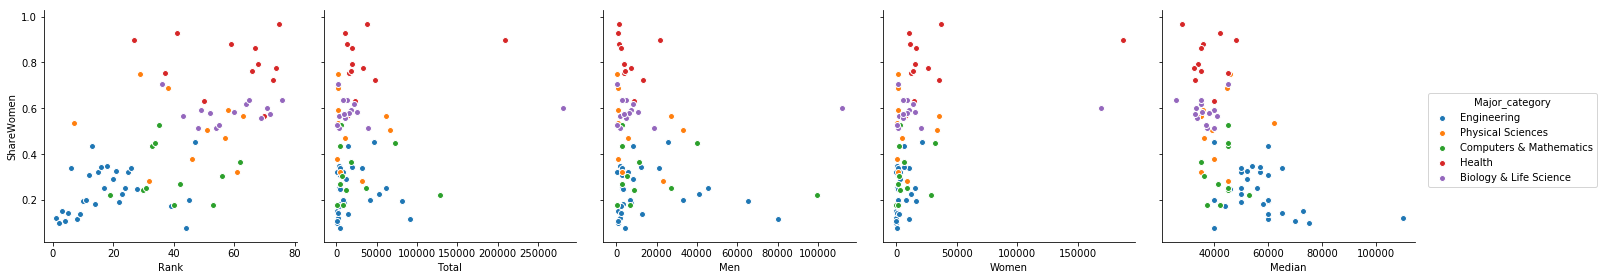

In [10]:
sns.pairplot(data=women_stem, hue='Major_category',y_vars='ShareWomen', x_vars=['Rank','Total','Men','Women','Median'], size=4.0)

We see from the plots that 
    1)'Engineering' appears to have higher ranks clustered near the upper ranks
    2) Women have higher share in 'Health' major
    3) 'Engineering' have higher median of salaries


## Dummy Variables

### We need dummy variables to represent categorical variables as continuous

Create dummy variables for all the categorical variables. We would take 'Major_category' and create 5 unique varaibles to represent 5 unique values in the dataset

In [11]:
women_stem_dummies = pd.get_dummies(women_stem, columns=["Major_category"])

Lets check the columns in the new data-set

In [12]:
women_stem_dummies.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women', 'ShareWomen',
       'Median', 'Median_Inverse', 'Major_category_Biology & Life Science',
       'Major_category_Computers & Mathematics', 'Major_category_Engineering',
       'Major_category_Health', 'Major_category_Physical Sciences'],
      dtype='object')

## Partitioning dataset into dependent and independent variables 

### We slice the dataset into dependent and independent variables for modelling regression

The dataset is sliced by the column names. We shall have all the independent variables in X and dependent / target variables in Y

In [13]:
X = women_stem_dummies[['Rank','Men','Women','Median_Inverse', 'Major_category_Biology & Life Science','Major_category_Computers & Mathematics', 'Major_category_Engineering','Major_category_Health', 'Major_category_Physical Sciences']]
y = women_stem_dummies['ShareWomen']

## Partitioning the data set into training and testing

Train dataset is used to form a linear equation and get the co-efficients for the independent variables.
Test dataset is used to test the output of the model against the actual data values.
We shall be partitioning the dataset as 80-20 i.e. 80% for training and 20% for testing

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

## Linear Modelling

### Creating a model based on Linear Regression

We shall be using LinearRegression model from sci-kit learn to form a linear regression model and fit our data to get the coefficients for the independent variables

In [15]:
from sklearn.linear_model import LinearRegression
stem_model= LinearRegression()
stem_model.fit(X_train,y_train)
Pred_Test= stem_model.predict(X_test)

## Prediciting the output based on the model 

We shall be predicting the model output 

In [16]:
Pred_Test= stem_model.predict(X_test)

In [17]:
from sklearn import metrics


MSE_Train = metrics.mean_squared_error(y_train,stem_model.predict(X_train))
MSE_Test = metrics.mean_squared_error(y_test,  Pred_Test)

print("Mean Squared Error (Train) :", MSE_Train)
print("Mean Squared Error (Test) :", MSE_Test)

Mean Squared Error (Train) : 0.00831963077033
Mean Squared Error (Test) : 0.0192110322109


## Comparing with another model

### Create another model and compare the model for fit

We shall be using Ordinary Least Squares model to train an another model and try to measure the effectiveness of the model over Linear Regression model

In [18]:
X = women_stem[['Men','Women','Median', 'Major_category']]
y = women_stem['ShareWomen']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

import statsmodels.formula.api as smf
lm = smf.ols('ShareWomen ~ Men + Women + Median + C(Major_category)', data = women_stem).fit()

### We check the summary to look at the  R-Sqaured, P(F) and coefficients of the independent variables

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ShareWomen   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     42.56
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           1.97e-22
Time:                        19:26:17   Log-Likelihood:                 67.597
No. Observations:                  76   AIC:                            -119.2
Df Residuals:                      68   BIC:                            -100.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.6412      0.055     11.641      0.000       0.531       0.751
C(Major_category)[T.Computers & Mathematics]    -0.2438      0.044     -5.522      0.000      -0.332      -0.156
C(Major_category)[T.Engineering]                -0.2953      0.045     -6.629      0.000      -0.384      -0.206
C(Major_category)[T.Health]                      0.1831      0.043      4.276      0.000       0.098       0.269
C(Major_category)[T.Physical Sciences]          -0.0624      0.044     -1.407      0.164      -0.151       0.026
Men                                          -1.395e-06   7.26e-07     -1.921      0.059   -2.84e-06    5.44e-08
Women                                         1.212e-06   5.59e-07      2.171      0.033    9.79e-08    2.33e-06
Median                                       -1.618e-06   1.28e-06     -1.260      0.212   -4.18e-06    9.45e-07
==============================================================================
Omnibus:                        0.257   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.369
Skew:                           0.128   Prob(JB):                        0.832
Kurtosis:                       2.774   Cond. No.                     2.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that the model is valid based on values of P(F). The model 

Calculate the predicted values from model - Ordinary Least Squares method

In [20]:
Pred_Test_OLS = lm.predict(X_test)

We need to the measure the effectiveness of the model. We shall use mean sqaured error for testing the same as for the Linear Regression model

In [21]:
from sklearn import metrics

MSE_Train = metrics.mean_squared_error(y_train,lm.predict(X_train))
MSE_Test = metrics.mean_squared_error(y_test,  Pred_Test_OLS)

print("Mean Squared Error (Train):", MSE_Train)
print("Mean Squared Error (Test):", MSE_Test)

Mean Squared Error (Train): 0.00873050734433
Mean Squared Error (Test): 0.0142143950527


We see that the ordinary least square regression is more fit to the data 